## Sieć ograniczenia

### Eksperymenty
1. Sprawdzenie wydajności i wyników algorytmu którego generator i funkcja krzyżowania może generować dane faworyzujące agregację albo dezagregację w każdym układzie.
2. Na przykład jak radzi sobie algorytm z generatorem agregacyjnym i krzyżowaniem dezagregacyjnym w porównaniu z algorytmem z generatorem i krzyżowaniem agregacyjnym
3. Eksperymenty związane z wykorzystywaniem rozbudowy. Na przykład wprowadzenie kary lub nagrody w funkcji kosztów za rozbudowywanie struktur ponad bazową wersję
4. Porównanie algorytmu priorytetyzującego najkrótsze połączenia i algorytmu który na to nie uważa
5. Porównanie algorytmu genetycznego i ewolucyjnego różniczkowego

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from main import run_evolution_algorithm, test_evolution_algorithm
from data_reader import parse_sndlib_file


with open("data.txt", "r") as file:
    file_content = file.read()
data = parse_sndlib_file(file_content)

### Algorytm genetyczny:

Poniżej przedstawiono wyniki uruchomienia algorytmu genetycznego dla 20 generacji.\
Algorytm dla domyślnych parametrów znajduje minimum lokalne (8250) około 18 generacji.

In [2]:
result = run_evolution_algorithm(data)
print(f"Result: {result}")

Result: [17020625, 15020625, 14019710, 10018738, 8018543, 6015879, 5016905, 5013431, 4013005, 3010779, 3010779, 1011322, 12462, 11916, 9963, 8745, 8718, 8250, 8250, 8250]


Następnie przeprowadzono eksperymenty z różnymi parametrami algorytmu genetycznego.\
Algorytm został wywołany 10 razy dla każdej kombinacji parametrów.

In [3]:
mean_results, std_results = test_evolution_algorithm(data)

In [4]:
severity_mean_results, severity_std_results = test_evolution_algorithm(data, severity_of_mutation=0.1)

In [5]:
chance_mean_results, chance_std_results = test_evolution_algorithm(data, normal_mutation_chance=0.1, switch_mutation_chance=0.1)

In [6]:
tournament_mean_results, tournament_std_results = test_evolution_algorithm(data, tournament_size=5)

Poniżej znajduje się wykres przedstawiający wyniki eksperymentów.\
Widoczne są różnice w wynikach dla różnych wartości parametrów algorytmu genetycznego.

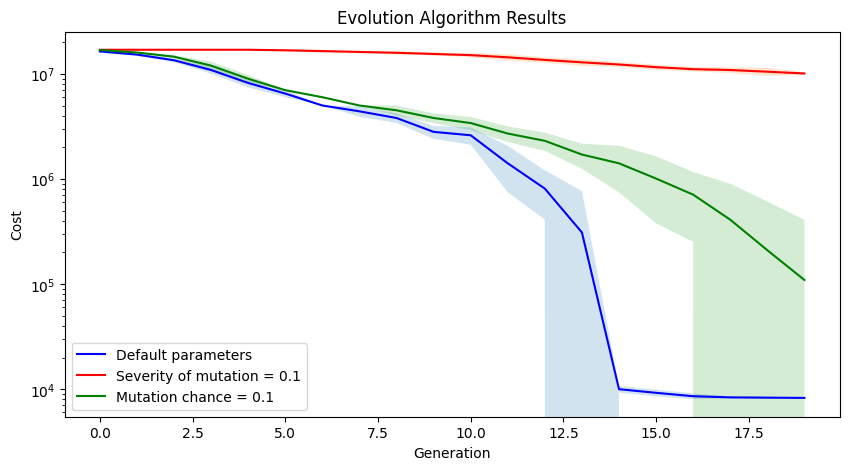

In [7]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(mean_results, label='Default parameters', color='blue')
plt.fill_between(range(20), mean_results - std_results, mean_results + std_results, alpha=0.2)
plt.plot(severity_mean_results, label='Severity of mutation = 0.1', color='red')
plt.fill_between(range(20), severity_mean_results - severity_std_results, severity_mean_results + severity_std_results, alpha=0.2)
plt.plot(chance_mean_results, label='Mutation chance = 0.1', color='green')
plt.fill_between(range(20), chance_mean_results - chance_std_results, chance_mean_results + chance_std_results, alpha=0.2)
plt.xlabel('Generation')
plt.ylabel('Cost')
plt.yscale('log')
plt.title('Evolution Algorithm Results')
plt.legend()
plt.show()